# Quick Regression

Let's see if we can predict something terribly!

In [16]:
# Bring in data
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Import LinearRegression
from sklearn.linear_model import LinearRegression
# Split the data
from sklearn.model_selection import train_test_split
# Import RandomForest
from sklearn.ensemble import RandomForestRegressor
# Import RSME
from sklearn.metrics import mean_squared_error

with open('final_data.pickle', 'rb') as file:
    final_data = pickle.load(file)
    
final_data.info()

with open('pitching_data.pickle', 'rb') as file:
    pitcher_data = pickle.load(file)

with open('position_data.pickle', 'rb') as file:
    position_data = pickle.load(file)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098 entries, 4 to 1712
Data columns (total 22 columns):
Unnamed: 0     1098 non-null int64
Age            1098 non-null int64
Destination    1098 non-null object
Origin         1098 non-null object
WAR_3          1098 non-null float64
nameFirst      1098 non-null object
nameLast       1098 non-null object
Dollars        1098 non-null float64
Length         1098 non-null int64
Name           1098 non-null object
Position_x     1098 non-null object
playerID       1098 non-null object
yearID         1098 non-null int64
G              1098 non-null float64
OBP            1098 non-null float64
SLG            1098 non-null float64
HR             1098 non-null float64
RBI            1098 non-null float64
Position_y     1098 non-null object
name           1098 non-null object
teamID         1098 non-null object
label          1098 non-null int32
dtypes: float64(7), int32(1), int64(4), object(10)
memory usage: 193.0+ KB


In [17]:
# Define function for Dollars
def predictDollars(model, X, y):
    
    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size = 0.1)
    
    # Train the model
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    plt.scatter(y_pred, y_test, color = 'blue')
    plt.xlabel('Predicted Dollars (millions)')
    plt.ylabel('Actual Dollars (millions)')
    plt.title('Prediction Contract Value')
    plt.yticks([0,4e7,8e7,1.2e8,1.6e8],['0','40','80','120','160'])
    plt.xticks([0,2e7,4e7,6e7,8e7,1e8],['0','20','40','60','80','100'])
    plt.text(x = 0, y = 1.5e8, s = "R^2 = {:0.3f}".format(model.score(X_test, y_test)))
    # plt.savefig('./contract_dollars_regression.png')
    plt.show()

    return model.score(X_test, y_test)

In [18]:
# Definte function for contract length
def predictLength(model, X, y):
    
    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size = 0.1)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    plt.scatter(y_pred, y_test, color = 'red')

    plt.xlabel('Predicted Contract Length (years)')

    plt.ylabel('Actual Contract Length (years)')

    plt.title('Prediction Contract Length')
    plt.text(x = 1, y = 7, s = "R^2 = {:0.3f}".format(model.score(X_test, y_test)))
    #plt.savefig('./contract_length_regression.png')
    plt.show()

    return model.score(X_test, y_test)

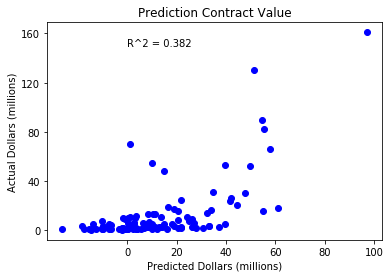

0.38160426616466497

In [19]:
# The Destination can stay for now, but drop all the others
X = final_data[['Age','WAR_3','yearID','G','OBP','SLG','HR','RBI','label']].values
y = final_data['Dollars'].values

lm = LinearRegression()

predictDollars(lm, X, y)

# Try it on Contract Length

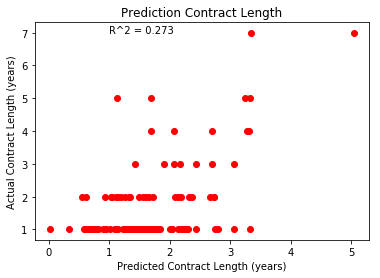

0.27300653036730171

In [20]:
y = final_data['Length'].values

predictLength(lm, X, y)

## Attempt 2: Batting Data w/ Team WAR

Woo!

### Step 1: Predict which players will get contracts

In [21]:
# Do this in a bit

# Designate interesting columns
features = ['Age', 'WAR_3', 'G', 'OBP', 'SLG', 'HR', 'RBI', 'SB',
            'Med_WAR', 'Min_WAR']

# For now, simulate dropping these
position_trimmed = position_data.dropna()
position_trimmed['Position'] = position_trimmed['Position'].astype('category')
position_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 866
Data columns (total 22 columns):
Age                 562 non-null int64
Destination         562 non-null object
WAR_3               562 non-null float64
nameFirst           562 non-null object
nameLast            562 non-null object
Year                562 non-null int64
Dollars             562 non-null float64
Length              562 non-null int64
Position            562 non-null category
playerID            562 non-null object
yearID              562 non-null int64
G                   562 non-null float64
OBP                 562 non-null float64
SLG                 562 non-null float64
HR                  562 non-null float64
RBI                 562 non-null float64
SB                  562 non-null float64
Med_WAR             562 non-null float64
Min_WAR             562 non-null float64
Inflation_Factor    562 non-null float64
Total               562 non-null float64
Dollars_2006        562 non-null float64
dtyp

/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Step 2: Predict how big the contracts will be

Make 2 models, and do it in 2006 dollars

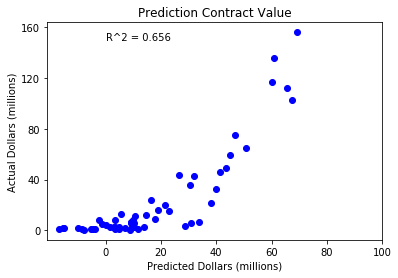

0.65555502260454257

In [22]:
# Grab just the features and the outcome
X = position_trimmed[features].values
y_dollars = position_trimmed['Dollars_2006'].values
y_dollars_raw = position_trimmed['Dollars'].values
y_length = position_trimmed['Length'].values
predictDollars(lm, X, y_dollars)

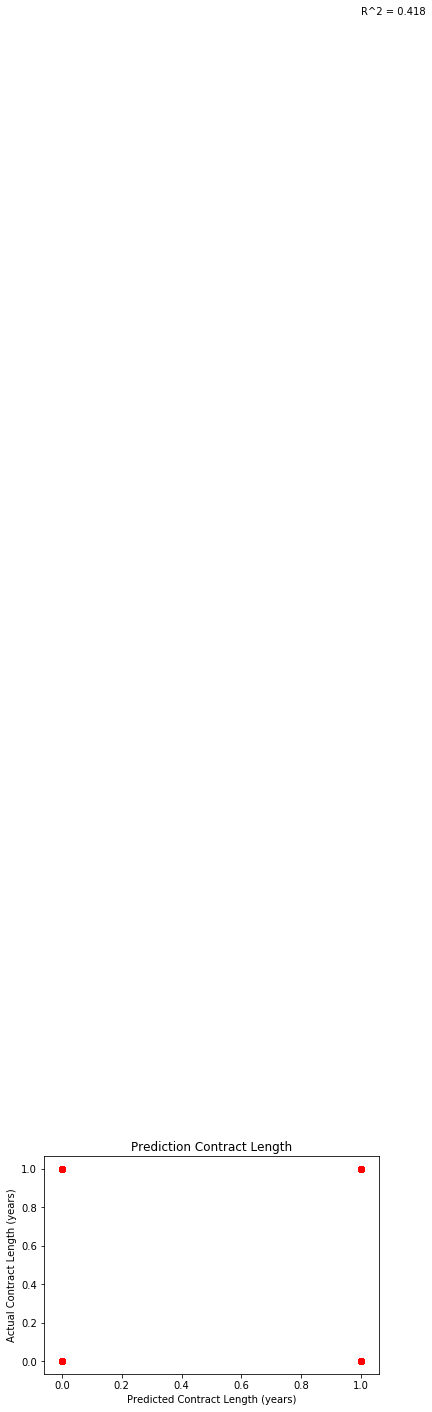

0.41818181818181815

In [44]:
# Do length (This is wrong; need multi-class!)
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logr = OneVsRestClassifier(LogisticRegression())

y_dummies  = pd.get_dummies(y_length)

predictLength(logr, X, y_dummies)

## Try Random Forest...now let's add Position to the matrix!

In [24]:
X = position_trimmed[features].values

rf = RandomForestRegressor()

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

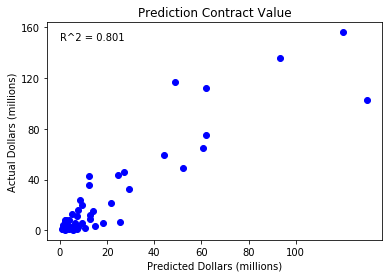

0.80050196049039113

In [28]:
predictDollars(rf, X, y_dollars)

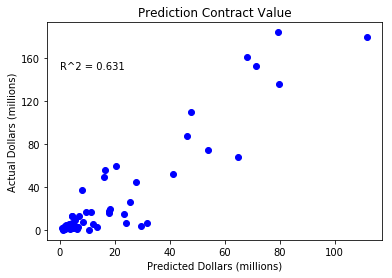

0.6307613185416614

In [31]:
predictDollars(rf, X, y_dollars_raw)

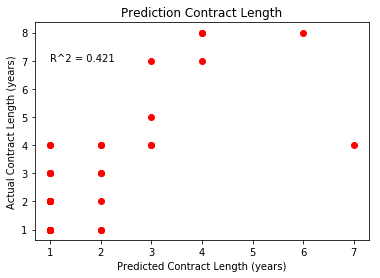

0.42105263157894735

In [27]:
predictLength(rfc, X, y_length)

## Try Elastic net...

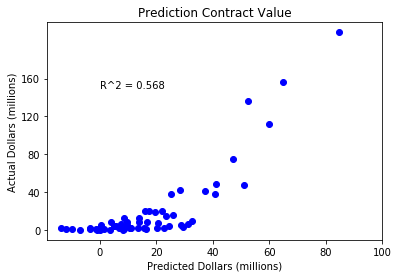

0.56766037671250391

In [66]:
from sklearn.linear_model import ElasticNet

en = ElasticNet()

predictDollars(en, X, y_dollars)

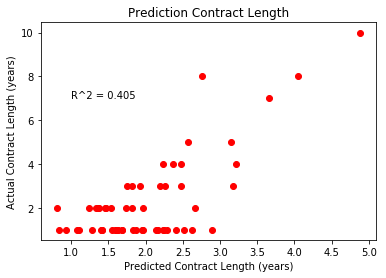

0.40544971552139086

In [67]:
predictLength(en, X, y_length)

### Make quadratic terms

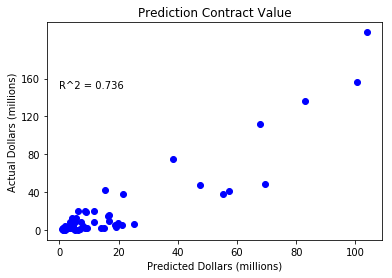

0.7358553634568672

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
                   
poly = PolynomialFeatures()

something = poly.fit_transform(X)

predictDollars(rf, X, y_dollars)

In [77]:
np.sqrt(4)

2.0

## Try it for pitchers; straight to RF + LM!

In [32]:
pitcher_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 864
Data columns (total 23 columns):
Age                 865 non-null int64
Destination         865 non-null object
WAR_3               865 non-null float64
nameFirst           865 non-null object
nameLast            865 non-null object
Year                865 non-null int64
Dollars             545 non-null float64
Length              865 non-null int64
Position            865 non-null object
playerID            865 non-null object
yearID              865 non-null int64
ERA                 865 non-null float64
WHIP                865 non-null float64
K_9                 865 non-null float64
HR_9                865 non-null float64
IPouts              865 non-null float64
W                   865 non-null float64
SV                  865 non-null float64
Med_WAR             865 non-null float64
Min_WAR             865 non-null float64
Inflation_Factor    865 non-null float64
Total               865 non-null float64
Dollar

In [33]:
# Designate interesting columns
features = ['Age', 'WAR_3', 'ERA', 'WHIP', 'K_9', 'HR_9', 'IPouts',
            'W', 'SV', 'Med_WAR', 'Min_WAR']

# For now, simulate dropping these
pitcher_trimmed = pitcher_data.dropna()
pitcher_trimmed['Position'] = pitcher_trimmed['Position'].astype('category')

X = pitcher_trimmed[features].values
y_dollars = pitcher_trimmed['Dollars_2006'].values
y_length = pitcher_trimmed['Length'].values

/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


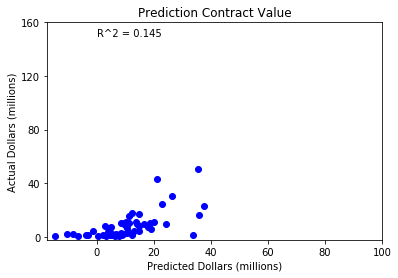

0.14544296290643943

In [37]:
# Try the LM
predictDollars(lm, X, y_dollars)

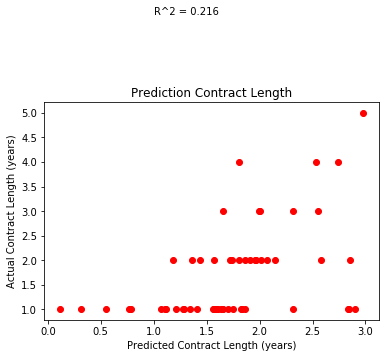

0.21579327389380457

In [38]:
predictLength(lm, X, y_length)

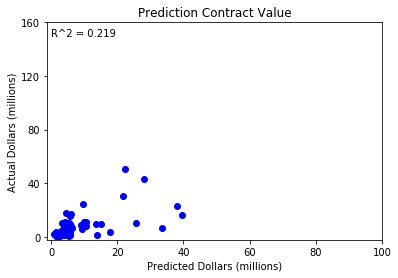

0.21891086315774455

In [40]:
# Try RF
predictDollars(rf, X, y_dollars)

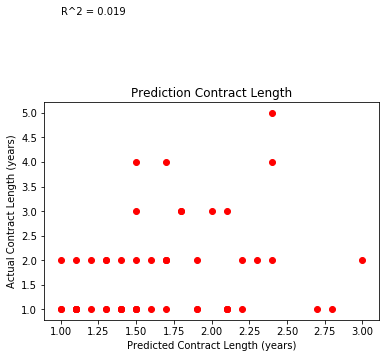

0.018997875354107574

In [41]:
predictLength(rf, X, y_length)

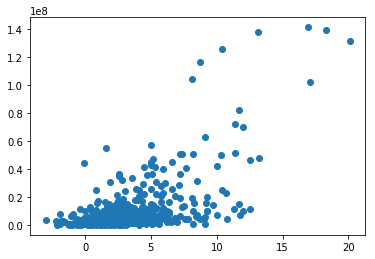

In [42]:
plt.scatter(pitcher_trimmed.WAR_3, pitcher_trimmed.Dollars_2006)
plt.show()

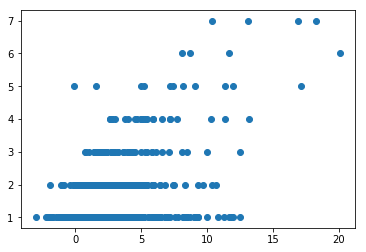

In [43]:
plt.scatter(pitcher_trimmed.WAR_3, pitcher_trimmed.Length)
plt.show()